In [89]:
import pandas as pd
import seaborn as sns

In [65]:
housing = pd.read_csv('C:/Users/Admin/Desktop/Data1/housing_data.csv',
                      parse_dates=['period_begin','period_end'],
                      dtype={'total_homes_sold':'Int32','region_name':'category'})
ca_housing= housing.loc[
    (housing['region_name'].str.contains('CA'))
].assign(region_name = housing['region_name'].str[0:-11])

ca_housing_pivot = (ca_housing.pivot_table(
                                    index='period_begin',
                                    columns = 'region_name',
                                    values = 'median_active_list_price')
                                .loc[:,
                                     ['San Francisco',
                                       'Los Angeles',
                                       'San Diego',
                                       'Tulare']
                                    ]
                                .assign(overall_avg = lambda x: x.mean(axis = 1))
                    
                                     )
ca_housing_pivot.head()


region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


In [38]:
housing.head(5)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [39]:
type(housing['total_homes_sold'])#intially pandas.core.series.Series

pandas.core.series.Series

In [40]:
type(housing['region_name'])#intially pandas.core.series.Series

pandas.core.series.Series

In [50]:
housing.sort_values('region_name')

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
212729,"Abbeville County, SC",2018-04-09,2018-07-01,7,35.0,36.0,86.3,198633.3,29.000000
345101,"Abbeville County, SC",2017-06-19,2017-09-10,12,30.0,32.0,78.2,179520.8,26.888889
594396,"Abbeville County, SC",2019-11-18,2020-02-09,14,40.0,41.0,106.5,222525.0,33.500000
128978,"Abbeville County, SC",2021-04-26,2021-07-18,22,17.0,19.0,29.8,293425.0,11.033333
292069,"Abbeville County, SC",2017-09-04,2017-11-26,11,25.0,26.0,108.0,233829.1,22.500000
...,...,...,...,...,...,...,...,...,...
258535,"Lake County, TN",2022-04-18,2022-07-10,<NA>,1.0,1.0,4.0,79900.0,NaN
490139,"Pemiscot County, MO",2022-04-18,2022-07-10,<NA>,1.0,1.0,12.0,79900.0,NaN
172253,"Pemiscot County, MO",2022-04-11,2022-07-03,<NA>,1.0,1.0,8.5,79900.0,NaN
280957,"Pemiscot County, MO",2022-04-04,2022-06-26,<NA>,1.0,1.0,5.0,79900.0,NaN


In [67]:
housing.groupby(['region_name'])
housing['region_name'].value_counts().head(20)

Abbeville County, SC    278
Moniteau County, MO     278
Monroe County, WI       278
Monroe County, TN       278
Monroe County, OH       278
Monroe County, NY       278
Monroe County, MO       278
Monroe County, MI       278
Monroe County, IN       278
Monroe County, IL       278
Monroe County, IA       278
Monroe County, GA       278
Monroe County, FL       278
Monroe County, AR       278
Mono County, CA         278
Monmouth County, NJ     278
Moffat County, CO       278
Morris County, NJ       278
Modoc County, CA        278
Mobile County, AL       278
Name: region_name, dtype: int64

In [69]:
ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


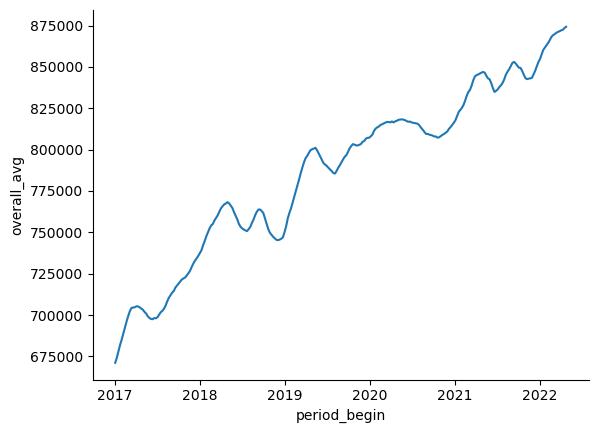

In [68]:
#line plot...recomand matplotlib for this
#for aggregating
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y='overall_avg'
    )
sns.despine()




In [70]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


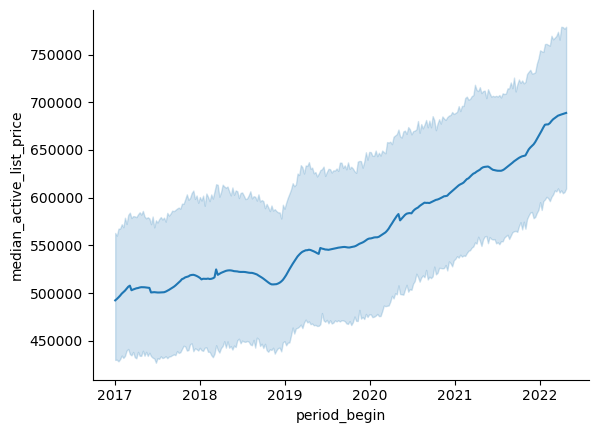

In [73]:
#for non aggregating
sns.lineplot(
             data=ca_housing,
             x='period_begin',
             y='median_active_list_price'
            )
sns.despine()

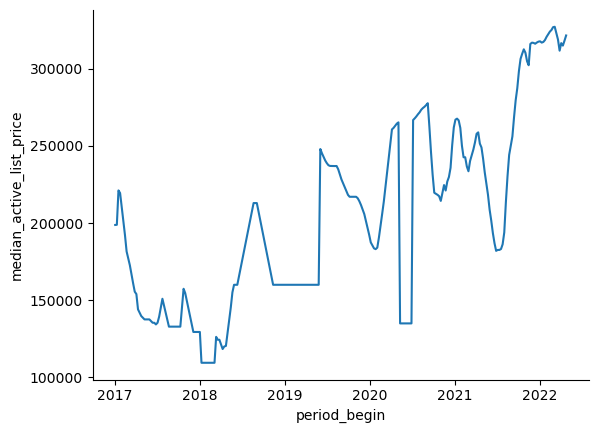

In [78]:
sns.lineplot(
             data=ca_housing,
             x='period_begin',
             y='median_active_list_price',
             ci=None,
             estimator=min
            )
sns.despine()

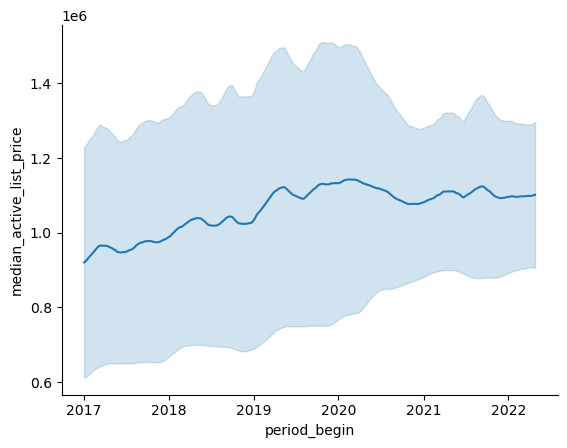

In [84]:
sns.lineplot(
             data=ca_housing.query("region_name in ['Los Angeles','San Francisco']"),
             x='period_begin',
             y='median_active_list_price',
             #ci=None,
             #hue='region_name',
             #ls='--'
            
            )
sns.despine()

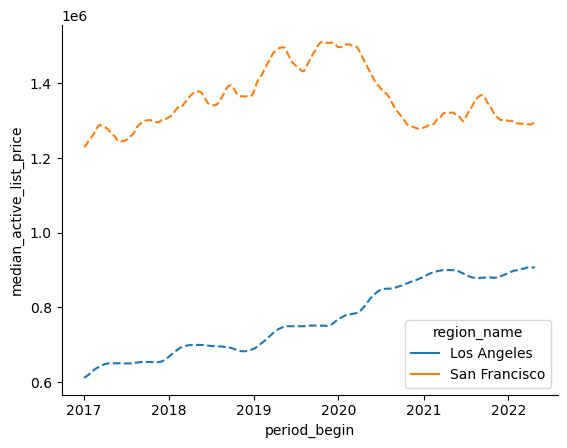

In [85]:
sns.lineplot(
             data=ca_housing.query("region_name in ['Los Angeles','San Francisco']"),
             x='period_begin',
             y='median_active_list_price',
             ci=None,
             hue='region_name',
             ls='--'
            
            )
sns.despine()

<AxesSubplot:xlabel='period_begin'>

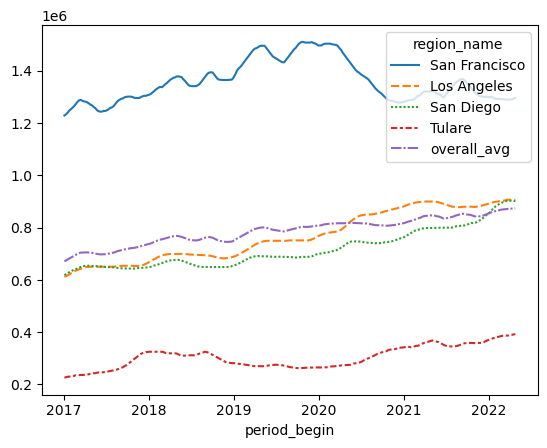

In [86]:
sns.lineplot(
    data=ca_housing_pivot
)

<AxesSubplot:xlabel='period_begin', ylabel='overall_avg'>

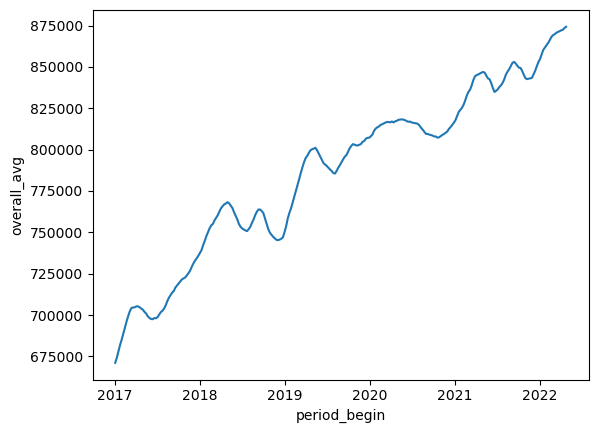

In [88]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y='overall_avg'
)

In [91]:
daimonds = pd.read_csv('C:/Users/Admin/Desktop/Data1/Diamonds Prices2022.csv')
daimonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='cut', ylabel='price'>

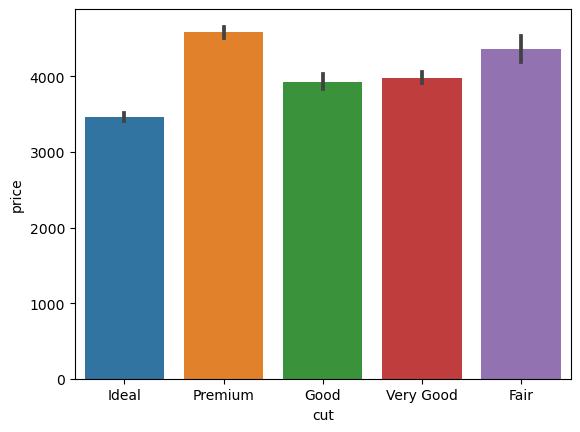

In [92]:
#bar plot(recommanded in sns)
sns.barplot(x='cut',y='price',data=daimonds)

<AxesSubplot:xlabel='price', ylabel='cut'>

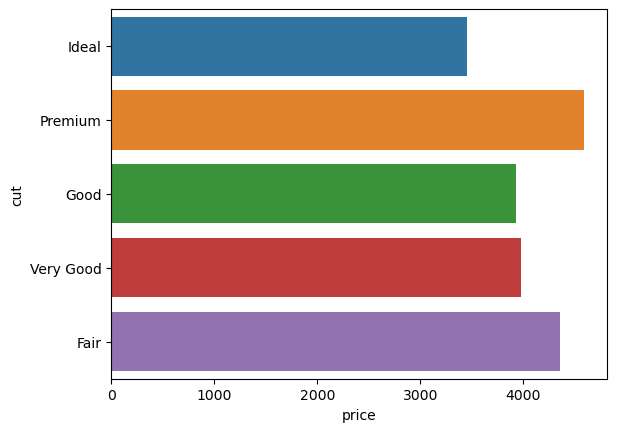

In [94]:
sns.barplot(x='price',y='cut',ci=None,data=daimonds)

<AxesSubplot:xlabel='price', ylabel='cut'>

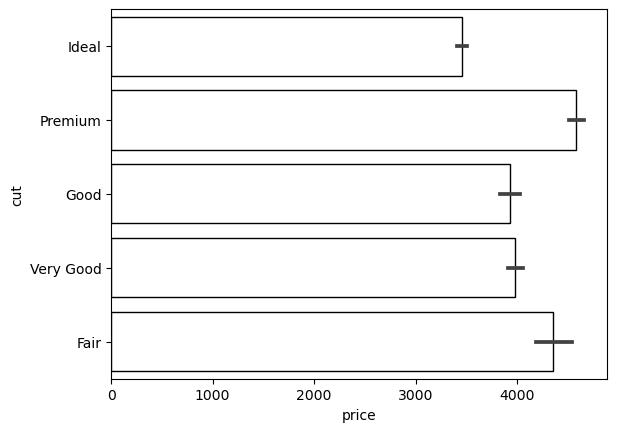

In [97]:
sns.barplot(data=daimonds,x='price',y='cut',facecolor='white',edgecolor='black')

<AxesSubplot:xlabel='price', ylabel='cut'>

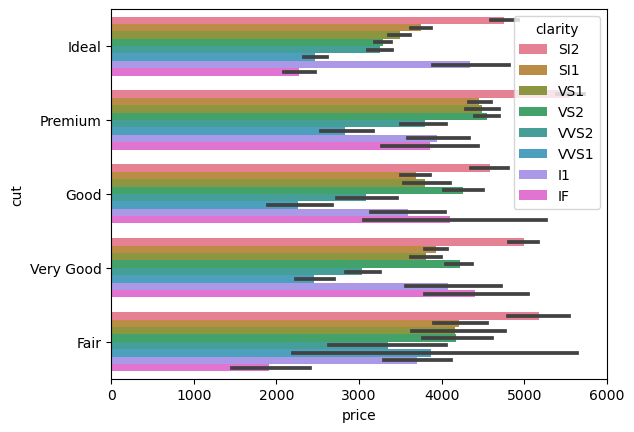

In [102]:
sns.barplot(
            y='cut',
            x='price',
            hue='clarity',#based on color clarity col decided...it also gives legend to identify value
            data=daimonds,
            palette='husl'#combination of colors
            )

<AxesSubplot:xlabel='price', ylabel='Percent'>

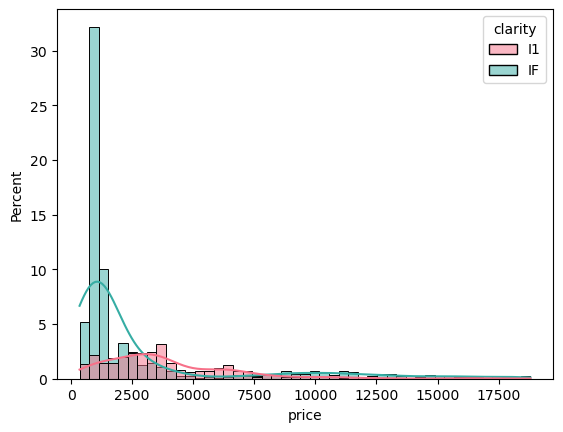

In [110]:
sns.histplot(
            x='price',
            hue='clarity',#based on color clarity col decided...it also gives legend to identify value
            data=daimonds.query("clarity in ['I1','IF']"),
            palette='husl',
            stat='percent',
          #  bins=10,
         #   binwidth=1000,
            kde=True
            
            )